In [1]:
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq
model = ChatGroq(model="llama-3.1-8b-instant")

In [2]:
def multiply(a:int,b:int)->int:
    """Muultiply a and b

    Args:
        a (int): First int
        b (int): Second int

    
    """
    return a*b

def add(a:int,b:int)->int:
    """Addition of a and b

    Args:
        a (int): First int
        b (int): Second int

   
    """
    return a+b

def divide(a:int,b:int)->int:
    """Divide a and b

    Args:
        a (int): First int
        b (int): Second int
   
    """
    return a/b

tools = [add,divide,multiply]  
tools  

[<function __main__.add(a: int, b: int) -> int>,
 <function __main__.divide(a: int, b: int) -> int>,
 <function __main__.multiply(a: int, b: int) -> int>]

In [3]:
##First Way to pass as a List
llm_with_tools = model.bind_tools([add,divide,multiply])
llm_with_tools

llm_with_tools.invoke("What is ai")


##Another way
#llm_with_tools = model.bind_tools(tools)
#tools



AIMessage(content="I'm not able to answer that question.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 361, 'total_tokens': 371, 'completion_time': 0.026396022, 'completion_tokens_details': None, 'prompt_time': 0.020009898, 'prompt_tokens_details': None, 'queue_time': 0.056258302, 'total_time': 0.04640592}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b2bd6-8f88-7bb0-904a-197afbbcbf87-0', usage_metadata={'input_tokens': 361, 'output_tokens': 10, 'total_tokens': 371})

In [8]:
from langchain_core.messages import HumanMessage,AIMessage
from langgraph.graph import MessagesState


st_msg = AIMessage(content="you are helpful to provide the assistance of arthmetic operations")

def assistance(state:MessagesState):
    return {"messages":[llm_with_tools.invoke([st_msg] + state["messages"])]}

def humans(state:MessagesState):
    pass

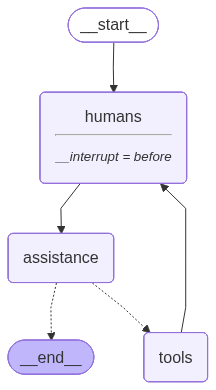

In [9]:
from langgraph.graph import START,END,StateGraph
from IPython.display import Image,display
from langgraph.prebuilt import ToolNode,tools_condition
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.runnables.graph import MermaidDrawMethod

import nest_asyncio
nest_asyncio.apply()

memory = MemorySaver()

###Define the Graph
graph = StateGraph(MessagesState)

## Define the Nodes
graph.add_node("humans",humans)
graph.add_node("tools",ToolNode(tools))
graph.add_node("assistance",assistance)

## Define the Edges
graph.add_edge(START,"humans")
graph.add_edge("humans","assistance")
graph.add_conditional_edges(
    "assistance",
    tools_condition,
    
)
graph.add_edge("tools","humans")

graph_builder = graph.compile(interrupt_before=['humans'],checkpointer=memory)

display(Image(graph_builder.get_graph().draw_mermaid_png()))